In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [2]:
cancer_dataset = pd.read_csv('../Dataset/dataset_with_missing_values.csv')

In [3]:
cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,NaN,0.10960,0.15990,0.1974,NaN,...,23.57,25.53,NaN,1709.0,0.1444,0.4245,NaN,0.2430,0.3613,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
cancer_dataset = cancer_dataset.drop(columns='id', axis=1)

In [5]:
cancer_dataset.shape

(569, 31)

In [6]:
cancer_dataset.isnull().sum()

diagnosis                   0
radius_mean                 0
texture_mean                2
perimeter_mean              0
area_mean                   3
smoothness_mean             7
compactness_mean            3
concavity_mean              5
concave points_mean         6
symmetry_mean               3
fractal_dimension_mean      2
radius_se                   4
texture_se                  3
perimeter_se                4
area_se                     3
smoothness_se              10
compactness_se              6
concavity_se                1
concave points_se           6
symmetry_se                 4
fractal_dimension_se        2
radius_worst                3
texture_worst               1
perimeter_worst             3
area_worst                  4
smoothness_worst            0
compactness_worst           6
concavity_worst             3
concave points_worst        3
symmetry_worst              1
fractal_dimension_worst     3
dtype: int64

In [7]:
cancer_dataset = cancer_dataset.dropna(thresh=cancer_dataset.shape[1]-7, axis=0)

In [8]:
cancer_dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,567.000000,566.000000,567.000000,565.000000,560.000000,564.000000,562.000000,562.000000,565.000000,565.000000,...,565.000000,566.000000,565.000000,563.000000,567.000000,562.000000,565.000000,564.000000,567.000000,565.000000
mean,14.125136,19.276802,91.954621,653.818938,0.096334,0.104314,0.088814,0.048951,0.181248,0.062763,...,16.278246,25.666007,107.195929,876.077620,0.132349,0.254885,0.273076,0.114653,0.290120,0.083926
std,3.517790,4.307084,24.256876,351.063762,0.014059,0.052937,0.079881,0.038680,0.027405,0.007052,...,4.828349,6.157515,33.494994,562.794824,0.022867,0.157834,0.208558,0.065642,0.061771,0.018121
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.705000,16.170000,75.190000,420.300000,0.086290,0.064815,0.029565,0.020413,0.162000,0.057690,...,13.030000,21.065000,84.160000,514.650000,0.116600,0.146300,0.116700,0.064730,0.250450,0.071270
50%,13.370000,18.825000,86.240000,551.100000,0.095895,0.092525,0.061400,0.033600,0.179300,0.061490,...,14.970000,25.370000,97.660000,684.500000,0.131300,0.214850,0.228200,0.100015,0.282200,0.079930
75%,15.780000,21.795000,103.950000,782.600000,0.105300,0.130400,0.130350,0.073910,0.195700,0.066120,...,18.790000,29.705000,125.100000,1077.000000,0.146050,0.339700,0.382900,0.161675,0.317750,0.092090
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
cancer_dataset.shape

(567, 31)

In [10]:
cancer_dataset.replace({'diagnosis': {'B':0, 'M':1}}, inplace=True)

In [11]:
cancer_dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [12]:
cancer_dataset['diagnosis'].value_counts()

0    356
1    211
Name: diagnosis, dtype: int64

In [13]:
cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                567 non-null    int64  
 1   radius_mean              567 non-null    float64
 2   texture_mean             566 non-null    float64
 3   perimeter_mean           567 non-null    float64
 4   area_mean                565 non-null    float64
 5   smoothness_mean          560 non-null    float64
 6   compactness_mean         564 non-null    float64
 7   concavity_mean           562 non-null    float64
 8   concave points_mean      562 non-null    float64
 9   symmetry_mean            565 non-null    float64
 10  fractal_dimension_mean   565 non-null    float64
 11  radius_se                564 non-null    float64
 12  texture_se               564 non-null    float64
 13  perimeter_se             563 non-null    float64
 14  area_se                  5

In [14]:
cancer_dataset.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.153152,17.909073,78.120253,463.253239,0.092516,0.080101,0.046136,0.025905,0.174337,0.062809,...,13.390393,23.484592,87.092930,559.001408,0.124941,0.182839,0.167260,0.074583,0.270462,0.079411
1,17.452275,21.595429,115.296019,975.965714,0.102795,0.145443,0.160896,0.087877,0.192843,0.062686,...,21.123270,29.336161,141.179571,1417.241346,0.144847,0.375647,0.450607,0.182200,0.323289,0.091558


In [15]:
correlation = cancer_dataset.corr()

In [16]:
correlation

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.728787,0.413824,0.741467,0.706396,0.353597,0.596668,0.694958,0.775041,0.326928,...,0.775392,0.459928,0.781034,0.736685,0.421163,0.591503,0.657765,0.793252,0.413750,0.324246
radius_mean,0.728787,1.000000,0.323519,0.997840,0.987254,0.162324,0.504372,0.677046,0.820347,0.141947,...,0.969361,0.301300,0.964764,0.942853,0.118526,0.410081,0.523680,0.743098,0.158451,0.006475
texture_mean,0.413824,0.323519,1.000000,0.329304,0.319688,-0.021691,0.237553,0.303559,0.297910,0.070474,...,0.352338,0.912833,0.355365,0.352980,0.078868,0.280768,0.302181,0.296187,0.105268,0.121171
perimeter_mean,0.741467,0.997840,0.329304,1.000000,0.986404,0.198197,0.555489,0.716347,0.849221,0.177472,...,0.969411,0.307323,0.970072,0.943800,0.149583,0.452641,0.560881,0.770306,0.183813,0.050719
area_mean,0.706396,0.987254,0.319688,0.986404,1.000000,0.167951,0.497992,0.685890,0.820687,0.149067,...,0.962439,0.289758,0.958712,0.960629,0.119792,0.386768,0.507560,0.718610,0.139671,0.003685
smoothness_mean,0.353597,0.162324,-0.021691,0.198197,0.167951,1.000000,0.656557,0.515317,0.545982,0.552162,...,0.207529,0.035820,0.231102,0.204462,0.805856,0.470356,0.430621,0.501229,0.386135,0.498895
compactness_mean,0.596668,0.504372,0.237553,0.555489,0.497992,0.656557,1.000000,0.883564,0.830838,0.601063,...,0.536654,0.250830,0.586436,0.518553,0.565717,0.865796,0.815208,0.816448,0.508063,0.690124
concavity_mean,0.694958,0.677046,0.303559,0.716347,0.685890,0.515317,0.883564,1.000000,0.920926,0.496860,...,0.692535,0.302449,0.727797,0.683032,0.448863,0.753469,0.883264,0.860722,0.405008,0.515918
concave points_mean,0.775041,0.820347,0.297910,0.849221,0.820687,0.545982,0.830838,0.920926,1.000000,0.457589,...,0.828901,0.299109,0.854211,0.813932,0.455229,0.667398,0.751943,0.910103,0.371521,0.372041
symmetry_mean,0.326928,0.141947,0.070474,0.177472,0.149067,0.552162,0.601063,0.496860,0.457589,1.000000,...,0.182104,0.091923,0.202330,0.177698,0.426636,0.469969,0.429003,0.426422,0.698398,0.440149


In [17]:
data = cancer_dataset.values

In [18]:
data.shape

(567, 31)

In [19]:
ix = [i for i in range(data.shape[1]) if i != 0]

In [20]:
x, y = data[:, ix], data[:, 0]

In [21]:
# summarizing total missing
print('Missing: %d' % sum(np.isnan(x).flatten()))

Missing: 85


In [22]:
# define imputer
imputer = KNNImputer(n_neighbors=6)

In [23]:
#fit on the dataset
imputer.fit(x)

KNNImputer(n_neighbors=6)

In [24]:
# transforming the dataset
xtrans = imputer.transform(x)

In [25]:
#summarizing total missing
print('Missing: %d' % sum(np.isnan(xtrans).flatten()))

Missing: 0


In [26]:
x_train, x_test, y_train, y_test = train_test_split(xtrans, y, test_size = 0.2, random_state = 4)

In [27]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(567, 30)
(453, 30)
(114, 30)
(453,)
(114,)


In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [29]:
x_train = x_train.reshape(453, 30, 1)
x_test = x_test.reshape(114, 30, 1)

## Model Evalution

In [30]:
epochs = 100
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(30,1)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Conv1D(filters=16, kernel_size=2, activation='relu',))
model.add(Conv1D(filters=16, kernel_size=2, activation='relu',))
model.add(Conv1D(filters=16, kernel_size=2, activation='relu',))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [31]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]
model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

BATCH_SIZE = 400
EPOCHS = 50

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 16)            48        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 16)            528       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 27, 16)            528       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 26, 16)            528       
_________________________________________________________________
flatten (Flatten)            (None, 416)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                13344     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0

In [33]:
model.compile(optimizer=Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(x_train, y_train, 
                    epochs=epochs, 
                    #callbacks=callbacks_list, 
                    validation_data = (x_test, y_test),
                    verbose=1)

Epoch 1/100
15/15 [==============================] - 14s 48ms/step - loss: 0.6207 - accuracy: 0.7373 - val_loss: 0.5041 - val_accuracy: 0.9298
Epoch 2/100
15/15 [==============================] - 0s 13ms/step - loss: 0.3926 - accuracy: 0.9338 - val_loss: 0.2491 - val_accuracy: 0.9386
Epoch 3/100
15/15 [==============================] - 0s 12ms/step - loss: 0.1988 - accuracy: 0.9470 - val_loss: 0.1397 - val_accuracy: 0.9474
Epoch 4/100
15/15 [==============================] - 0s 13ms/step - loss: 0.1452 - accuracy: 0.9492 - val_loss: 0.1425 - val_accuracy: 0.9298
Epoch 5/100
15/15 [==============================] - 0s 13ms/step - loss: 0.1285 - accuracy: 0.9470 - val_loss: 0.1172 - val_accuracy: 0.9561
Epoch 6/100
15/15 [==============================] - 0s 12ms/step - loss: 0.1185 - accuracy: 0.9625 - val_loss: 0.1216 - val_accuracy: 0.9474
Epoch 7/100
15/15 [==============================] - 0s 14ms/step - loss: 0.0785 - accuracy: 0.9713 - val_loss: 0.1166 - val_accuracy: 0.9474
Epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


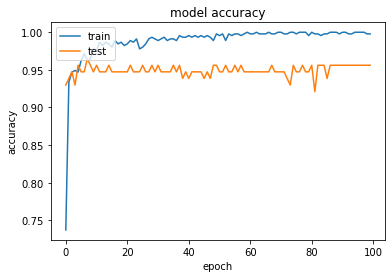

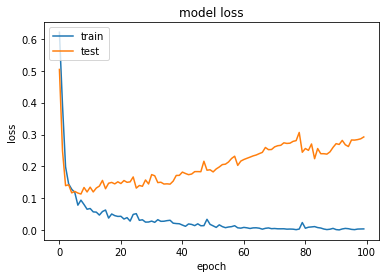

In [35]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 0.2925 - accuracy: 0.9561


[0.2924880385398865, 0.9561403393745422]

In [37]:
#for index in range(10):
# print(model.predict(x_train[25].T))
# if model.predict(x_train[25].T)[0][0] > 0.5:
#   print("B")
# else:
#   print("M")
# print(model.predict(x_train[index].T))
print(y_train[25])
print("")

1.0



3
dee


<ipython-input-38-7d10cc08d7a7>:58: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


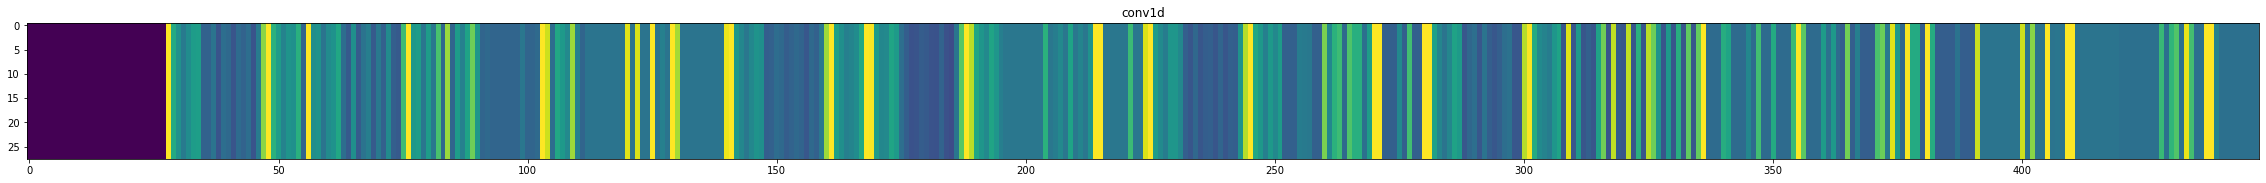

3
dee


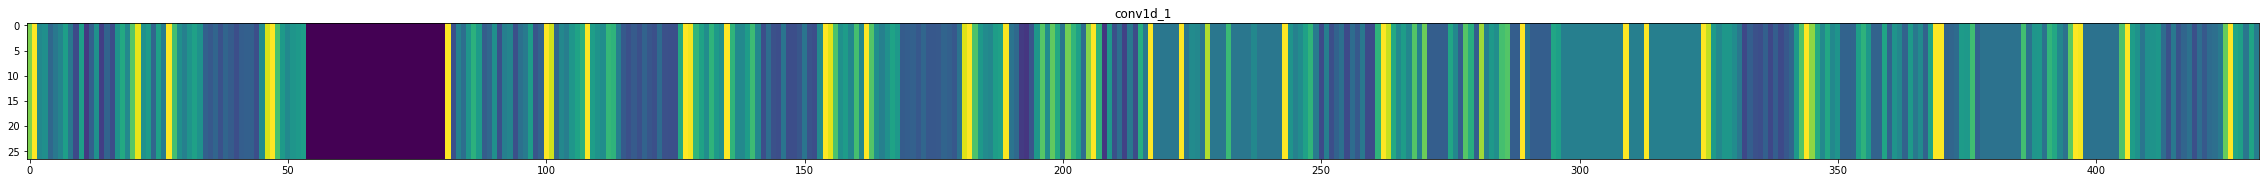

3
dee


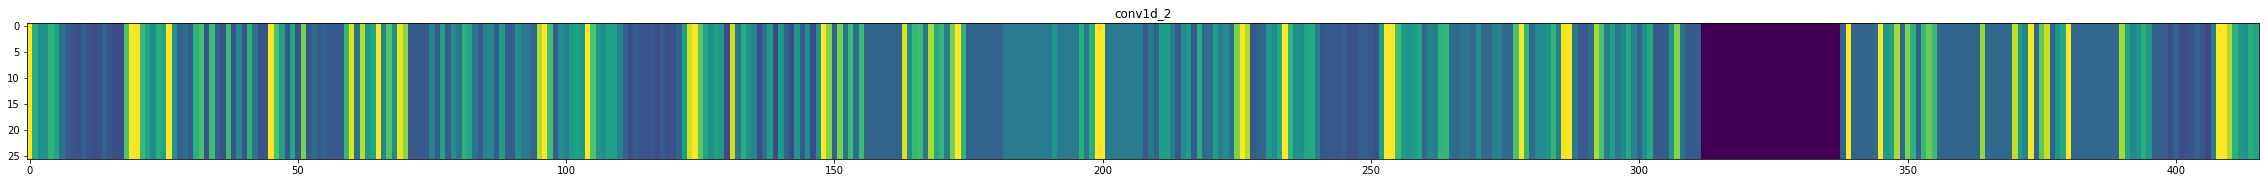

2
2
2
2


In [38]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
# cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
# dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

# img_path = random.choice(cat_img_files + dog_img_files)
# img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

# x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
# x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x = x_train[1].T

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(len(feature_map.shape))
  
  if len(feature_map.shape) == 3:
    print("dee")
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      # x  = feature_map[0, :, :, i]
      x  = feature_map[0, :, i]
      # x  = feature_map[0, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 40. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 
    plt.show()
  # if len(feature_map.shape) == 2:
  #   print("dee")
  #   #-------------------------------------------
  #   # Just do this for the conv / maxpool layers, not the fully-connected layers
  #   #-------------------------------------------
  #   n_features = feature_map.shape[-1]  # number of features in the feature map
  #   size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
  #   # We will tile our images in this matrix
  #   display_grid = np.zeros((size, size * n_features))
    
  #   #-------------------------------------------------
  #   # Postprocess the feature to be visually palatable
  #   #-------------------------------------------------
  #   for i in range(n_features):
  #     # x  = feature_map[0, :, :, i]
  #     # x  = feature_map[0, :, i]
  #     x  = feature_map[0, i]
  #     x -= x.mean()
  #     x /= x.std ()
  #     x *=  64
  #     x += 128
  #     x  = np.clip(x, 0, 255).astype('uint8')
  #     display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

  #   #-----------------
  #   # Display the grid
  #   #-----------------

    
  #   scale = 20. / n_features
  #   plt.figure( figsize=(scale * n_features, scale) )
  #   plt.title ( layer_name )
  #   plt.grid  ( False )
  #   plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 
  #   plt.show()